### Project Title: Classification Project
#### Done By: 
#### Data Engineers:

- Lizaan Botha
- Susheila Naick
- Amukelani Khosa
- Lutho Ntsepe
- Richard Marais
- Thabiso Nyokolodi

© ExploreAI 2024

---
Trello board : https://trello.com/invite/b/673b84b9d1cd7a9a14707eae/ATTI118b6ec773775dde7036453f1aaad0bc53A594A3/classification-project


Github Repo : https://github.com/LizaanB/2401PTDS_Classification_Project.git

---

## Context of this project

 The aim of this project is to analyse a dataset that 
provides a comprehensive collection of news articles 
across various domains, including Business, 
Technology, Sports, Education, and Entertainment.

This end-to-end project covers the entire workflow, 
including data loading, preprocessing, model training, 
evaluation, and final deployment.

 The app should allows users to input new articles and 
receive category predictions, demonstrating the 
model's practical utility. Hosting the model in a Streamlit 
app online illustrates its real-world application and 
value

# Import Packages
We will import more packages as we go

In [1]:
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import joblib

# Data Pre Processing and Cleaning

In [3]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lizaa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
# printing the stopwords in English
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [3]:
import pandas as pd

df = pd.read_csv('train.csv', encoding='unicode_escape')


In [4]:
df.shape

(5520, 5)

In [5]:
df.head()

,headlines,description,content,url,category
0,RBI revises definition of politically-exposed ...,The central bank has also asked chairpersons a...,The Reserve Bank of India (RBI) has changed th...,https://indianexpress.com/article/business/ban...,business
1,NDTV Q2 net profit falls 57.4% to Rs 5.55 cror...,NDTV's consolidated revenue from operations wa...,Broadcaster New Delhi Television Ltd on Monday...,https://indianexpress.com/article/business/com...,business
2,"Akasa Air âwell capitalisedâ, can grow muc...",The initial share sale will be open for public...,Homegrown server maker Netweb Technologies Ind...,https://indianexpress.com/article/business/mar...,business
3,Indiaâs current account deficit declines sha...,The current account deficit (CAD) was 3.8 per ...,Indiaâs current account deficit declined sha...,https://indianexpress.com/article/business/eco...,business
4,"States borrowing cost soars to 7.68%, highest ...",The prices shot up reflecting the overall high...,States have been forced to pay through their n...,https://indianexpress.com/article/business/eco...,business


In [6]:
# counting the number of missing values in the dataset
df.isnull().sum()

headlines      0
description    0
content        0
url            0
category       0
dtype: int64

In [9]:
# replacing the null values with empty string
df = df.fillna('')

In [10]:
print(df['content'])

0       The Reserve Bank of India (RBI) has changed th...
1       Broadcaster New Delhi Television Ltd on Monday...
2       Homegrown server maker Netweb Technologies Ind...
3       Indiaâs current account deficit declined sha...
4       States have been forced to pay through their n...
                              ...                        
5515    Samsung plans to reveal the next-generation fl...
5516    Google once again accidentally gave us a glimp...
5517    A new scam seems to be making rounds on the in...
5518    More than a year after Elon Musk acquired Twit...
5519    Apple has begun rolling out its iOS 17.2 updat...
Name: content, Length: 5520, dtype: object


In [12]:
# separating the data & label
X = df.drop(columns='headlines', axis=1)
Y = df['headlines']

In [13]:
print(X)
print(Y)

                                            description  \
0     The central bank has also asked chairpersons a...   
1     NDTV's consolidated revenue from operations wa...   
2     The initial share sale will be open for public...   
3     The current account deficit (CAD) was 3.8 per ...   
4     The prices shot up reflecting the overall high...   
...                                                 ...   
5515  Samsung is most likely to announce next-genera...   
5516  The Pixel 8 Pro will most likely carry over it...   
5517  Clicking on the real looking Amazon ad will op...   
5518  Elon Musk's X, formerly Twitter, has lost more...   
5519  Here is everything you need to know about the ...   

                                                content  \
0     The Reserve Bank of India (RBI) has changed th...   
1     Broadcaster New Delhi Television Ltd on Monday...   
2     Homegrown server maker Netweb Technologies Ind...   
3     Indiaâs current account deficit declined sha...

In [15]:
from nltk.stem import PorterStemmer

port_stem = PorterStemmer()


In [16]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [21]:
import re
from nltk.corpus import stopwords

In [ ]:
df['content'] = df['content'].apply(stemming)

In [23]:
print(df['content'])

0       reserv bank india rbi chang definit polit expo...
1       broadcast new delhi televis ltd monday report ...
2       homegrown server maker netweb technolog india ...
3       india current account deficit declin sharpli p...
4       state forc pay nose weekli auction debt tuesda...
                              ...                        
5515    samsung plan reveal next gener flagship galaxi...
5516    googl accident gave us glimps upcom flagship p...
5517    new scam seem make round internet legitim look...
5518    year elon musk acquir twitter billion platform...
5519    appl begun roll io updat elig iphon besid fix ...
Name: content, Length: 5520, dtype: object


In [24]:
#separating the data and label
X = df['content'].values
Y = df['headlines'].values

In [25]:
print(X)

['reserv bank india rbi chang definit polit expos person pep norm move make easier individu carri variou bank transact includ avail loan certain chang made rbi know custom kyc norm earlier norm pertain pep open end lack clariti definit appar lead issu banker parliamentarian other also concern certain quarter pep find difficult get loan open bank account advertis amend kyc master direct central bank defin pep individu entrust promin public function foreign countri includ head state govern senior politician senior govern judici militari offic senior execut state own corpor import polit parti offici new rule also includ person entrust foreign countri public function bank account pep addit kyc norm current provis special due dilig undertaken senior bank offici sub claus master direct kyc norm issu way circular februari remov central bank central bank also ask chairperson chief execut bank financi servic lend busi make chang effect immedi last year centr amend prevent money launder act pmla

In [26]:
print(Y)

['RBI revises definition of politically-exposed persons for KYC purpose'
 'NDTV Q2 net profit falls 57.4% to Rs 5.55 crore impacted by lower revenue and higher expenses'
 'Akasa Air â\x80\x98well capitalisedâ\x80\x99, can grow much faster: CEO Vinay Dube'
 ...
 'Amazon ad on Google Search redirects users to Microsoft tech support scam'
 'Elon Muskâ\x80\x99s X, previously Twitter, now worth less than half what he paid for it'
 'Appleâ\x80\x99s iOS 17.2 update released, and hereâ\x80\x99s how it will change your iPhone']


In [27]:
Y.shape

(5520,)

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer


vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X = vectorizer.transform(X)


In [30]:
print(X)

  (0, 192)	0.04157494950932287
  (0, 239)	0.0464451485256407
  (0, 270)	0.04275647881135037
  (0, 344)	0.025787621918432174
  (0, 757)	0.060161380937287595
  (0, 829)	0.1270461529779211
  (0, 1180)	0.06752523750195132
  (0, 1424)	0.03710937261452735
  (0, 1655)	0.03453857996543811
  (0, 1984)	0.3448130465018354
  (0, 1988)	0.0746488710777437
  (0, 3289)	0.03848867671661428
  (0, 3534)	0.05066874628376502
  (0, 3710)	0.042606916077458985
  (0, 3711)	0.12838258560667798
  (0, 3732)	0.1029631812812223
  (0, 3787)	0.06432386759858325
  (0, 3849)	0.11471385707754464
  (0, 4020)	0.04361826200208761
  (0, 4184)	0.06302039352709705
  (0, 4232)	0.06829740413121829
  (0, 4251)	0.08288435452479526
  (0, 4555)	0.04399162588080003
  (0, 4763)	0.046932707993061526
  (0, 4817)	0.06639913318379245
  :	:
  (5519, 11276)	0.10552356930299671
  (5519, 12333)	0.048228235424240914
  (5519, 13591)	0.09879641266750526
  (5519, 13851)	0.08212332642753624
  (5519, 14884)	0.11649718618282166
  (5519, 15111)	0.08

# EDA 

In [59]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
from textblob import TextBlob
from collections import Counter


In [61]:
# Word Frequency
word_freq = Counter(" ".join(df['content']).split()).most_common(20)
print("Most Common Words:", word_freq)


Most Common Words: [('the', 58518), ('to', 30708), ('and', 29564), ('of', 28306), ('in', 25592), ('a', 22657), ('for', 13114), ('on', 11082), ('is', 10976), ('The', 10398), ('with', 8794), ('that', 8559), ('have', 7296), ('at', 6954), ('from', 6314), ('has', 5889), ('as', 5867), ('an', 5807), ('by', 5634), ('was', 5467)]


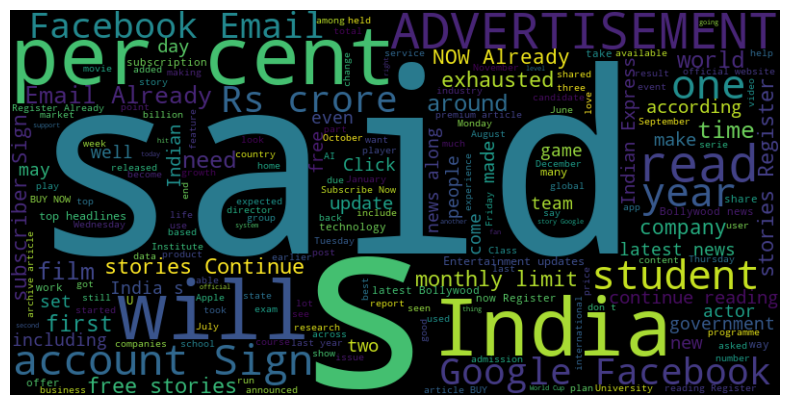

In [62]:
# Visualization: Word Cloud
wordcloud = WordCloud(width=800, height=400).generate(" ".join(df['content']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


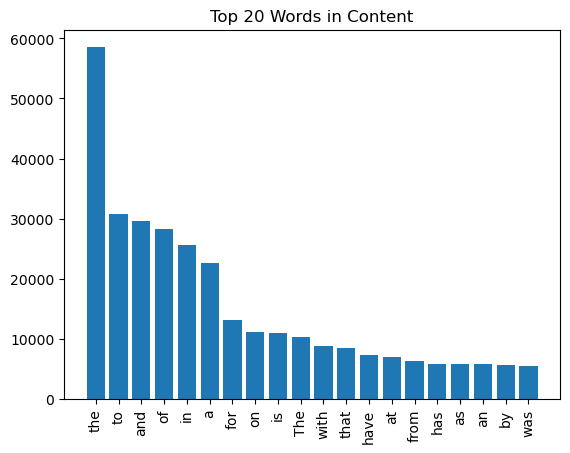

In [63]:
# Visualization: Bar Chart for Word Frequency
words, counts = zip(*word_freq)
plt.bar(words, counts)
plt.title('Top 20 Words in Content')
plt.xticks(rotation=90)
plt.show()

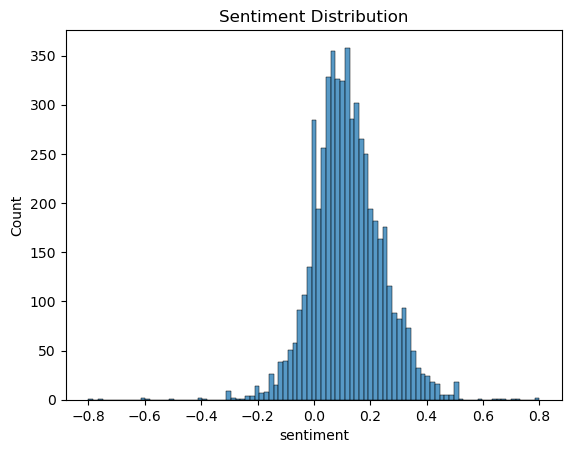

In [64]:
# Sentiment Analysis (using TextBlob, for example)
from textblob import TextBlob
df['sentiment'] = df['content'].apply(lambda x: TextBlob(x).sentiment.polarity)
sns.histplot(df['sentiment'])
plt.title('Sentiment Distribution')
plt.show()


In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)



# Training the Model:Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression


model = LogisticRegression()


In [38]:
df_sample = df.sample(frac=0.1, random_state=2)  # Use 10% of the data
X_sample = vectorizer.fit_transform(df_sample['content'])
Y_sample = df_sample['category']

X_train, X_test, Y_train, Y_test = train_test_split(X_sample, Y_sample, test_size=0.2, stratify=Y_sample, random_state=2)

model = LogisticRegression()
model.fit(X_train, Y_train)


LogisticRegression()

In [40]:
vectorizer = TfidfVectorizer(max_features=10000)  # Limit to 10,000 features
X = vectorizer.fit_transform(df['content'])


In [ ]:
model.fit(X_train, Y_train)

In [43]:
from sklearn.linear_model import SGDClassifier

# Train the model using SGDClassifier with the correct loss parameter
model = SGDClassifier(loss='log_loss')
model.fit(X_train, Y_train)

# Save the model
joblib.dump(model, 'Logistic_model')



['Logistic_model']

*Evaluation*

accuracy score

In [45]:
from sklearn.metrics import accuracy_score

# Your code
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

print(f"Training Data Accuracy: {training_data_accuracy}")


Training Data Accuracy: 1.0


In [46]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  1.0


In [47]:
# accuracy score on the test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [48]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.963963963963964


In [49]:
#Save the model and vectorizer
joblib.dump(model, 'trained_model.sav')
joblib.dump(vectorizer, 'vectorizer')

['vectorizer']

# Making a Predictive System

In [51]:
import streamlit as st

In [52]:
st.title("Article Category Predictor")

user_input = st.text_area("Enter Article Text:")

if st.button("Predict Category"):
    if user_input:
        # Preprocess the user input
        processed_input = stemming(user_input)
        vectorized_input = vectorizer.transform([processed_input])
        
        # Make prediction
        prediction = model.predict(vectorized_input)
        st.write(f"The predicted category is: {prediction[0]}")
    else:
        st.write("Please enter some text to get a prediction.")


2025-01-05 19:08:49.779 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-05 19:08:53.240 
  command:

    streamlit run C:\Users\lizaa\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-01-05 19:08:53.252 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-05 19:08:53.262 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-05 19:08:53.273 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-05 19:08:53.283 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-05 19:08:53.292 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-05 19:08:53.300 Session state does not 